# Introducton

This notebook is a quick introduction to `render` by giving a simple example of how to use it to render a [image card](https://www.w3schools.com/css/tryit.asp?filename=trycss3_box-shadow5).

### Render Single Image

`RenderImage` is 
+ a wrapper for `cv2.Mat` 
+ one of the most basic classes in `render` that can be used to perform image operations like `paste`, `concat`, etc. and is used as the return type for `RenderObject.render()`.

`Image` is a wrapper `RenderObject` for `RenderImage`. 

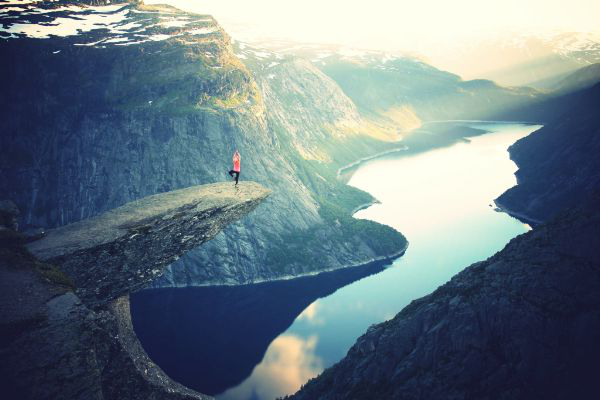

In [9]:
from render import Image

image = Image.from_url("https://www.w3schools.com/css/rock600x400.jpg")
image.render()

### Render Text

In [10]:
from render import Palette, Text

text = Text.of("Hardanger, Norway", font="arial.ttf", size=16)
text.render()

### Put it All Together

`Container` is a class that allows you to render several images in a row or column.
+ By specifying `alignment` you can control how the objects are aligned.
+ By specifying `direction` you can control whether the objects are rendered vertically or horizontally.

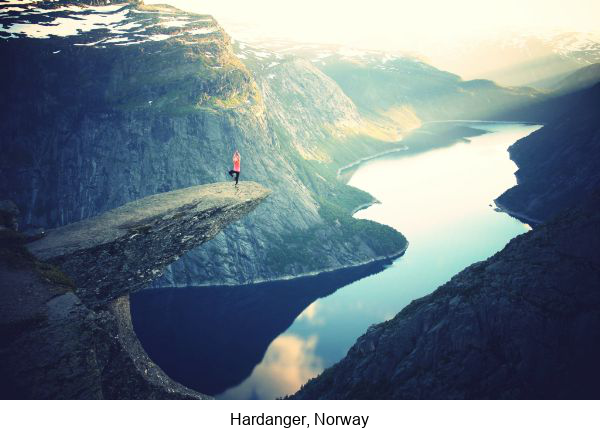

In [11]:
from render import Alignment, Container, Direction, Space

text.padding = Space.vertical(10)  # add 10px of vertical padding

container = Container.from_children(
    [image, text],
    alignment=Alignment.CENTER,
    direction=Direction.VERTICAL,
)
container.render()

The image seems a bit large, so let's resize it. 

We can do this by passing a `resize` parameter to the `from_url` method or directly modifying the `Image` object.

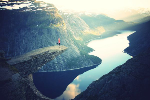

In [12]:
image2 = Image.from_url("https://www.w3schools.com/css/rock600x400.jpg",
                        resize=0.25)
image2.render()

For simplicity, we can modify the `Image` object **in place** to avoid creating a new object and a new container.

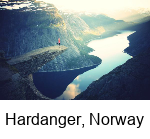

In [13]:
with image.modify():  # must modify with context manager
    image.im.rescale(0.25)
container.render()

### Add Shadow Decoration

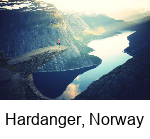

In [14]:
from render import BoxShadow, Decorations

container.background = Palette.WHITE
container.decorations = Decorations.of(
    BoxShadow.of(
        blur_radius=51,
        spread=4,
        color=Palette.BLACK.of_alpha(0.5),
    ))
container.render()

Oops, it seems nothing happened. This is because the decoration goes outside the image.

We can fix this by specifying the `margin` parameter.

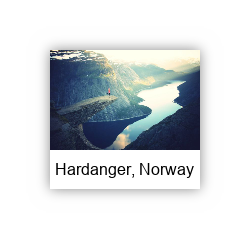

In [15]:
container.margin = Space.all(50)
container.render()

Now we get the desired result.

### A Nesting Style

We can also get the same result by nesting all things together.

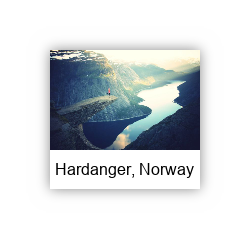

In [16]:
Container.from_children(
    children=[
        Image.from_url("https://www.w3schools.com/css/rock600x400.jpg",
                       resize=0.25),
        Text.of("Hardanger, Norway",
                font="arial.ttf",
                size=16,
                padding=Space.vertical(10)),
    ],
    alignment=Alignment.CENTER,
    direction=Direction.VERTICAL,
    margin=Space.all(50),
    background=Palette.WHITE,
    decorations=Decorations.of(
        BoxShadow.of(
            blur_radius=51,
            spread=4,
            color=Palette.BLACK.of_alpha(0.5),
        )),
).render()